In [1]:
import pandas as pd 
import numpy as np

from sklearn import preprocessing

In [2]:
biomarker_data = "Data/"

In [3]:
longcross_df = pd.read_csv(biomarker_data +"F_longcross.csv",low_memory=False)
longcross_df.head()

,Biomarker_project_type,PR_DATE,Biomarker_PI,Biomarker_institution,Biomarker_projectID,Biomarker_sampletype,TESTNAME,TESTVALUE,UNITS,RUNDATE,...,SCAU26CT,SCAU26DT,LDOPRTYP,LDOPRSPC,DCLPDO5Y,GBA_var,GBA_status,LRRK2_var,LRRK2_status,APOE
0,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,(4-Hydroxy-3-methoxyphenyl)ethanol,18197.20741,area,11/29/2018,...,Z,NaN,Z,6.0,1.0,NC,0.0,G2019S,1.0,E3/E3
1,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,(4-Hydroxy-3-methoxyphenyl)ethanol,0.0008928989999999998,area ratio,11/29/2018,...,Z,NaN,Z,6.0,1.0,NC,0.0,G2019S,1.0,E3/E3
2,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,1-Methylhistamine,31317.10022,area,11/29/2018,...,Z,NaN,Z,6.0,1.0,NC,0.0,G2019S,1.0,E3/E3
3,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,1-Methylhistamine,0.001670085,area ratio,11/29/2018,...,Z,NaN,Z,6.0,1.0,NC,0.0,G2019S,1.0,E3/E3
4,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,1-Methylhistidine,3234660.7810000004,area,11/29/2018,...,Z,NaN,Z,6.0,1.0,NC,0.0,G2019S,1.0,E3/E3


In [4]:
longcross_df.isnull().sum()

Biomarker_project_type          0
PR_DATE                         0
Biomarker_PI                    0
Biomarker_institution           0
Biomarker_projectID             0
Biomarker_sampletype         2606
TESTNAME                      121
TESTVALUE                  561012
UNITS                         714
RUNDATE                   1655646
lrrkid                       2000
EVENT                        4496
LRRK2_MUTATION               4535
datasrc                    173171
gender                     173171
educcat_calc               201397
racetxt                    173171
ethnctxt                   174921
pdenrl                     173171
agediag                   1333319
ageonset                  1355893
demopd_ageassess           179037
pd_duration               1363621
pdmedyn                    396215
MCATOT                     254384
moca_ageassess             231497
updrs1                     173171
updrs2                     173171
updrs3                     173171
nupdrs1p_ageas

In [5]:
longcross_df = longcross_df.dropna(axis=1, how='all')

In [6]:
longcross_df['pdenrl'] = longcross_df.groupby(['lrrkid'])['pdenrl'].apply(lambda x: x.bfill().ffill())
longcross_df['pdenrl'].isnull().sum()
#173171

65519

In [7]:
longcross_df['TESTVALUE'] = longcross_df.groupby(['lrrkid','TESTNAME'])['TESTVALUE'].apply(lambda x: x.bfill().ffill())
longcross_df['TESTVALUE'].isnull().sum()
##561012

116772

In [8]:
longcross_df['gender'] = longcross_df.groupby(['lrrkid'])['gender'].apply(lambda x: x.bfill().ffill())
longcross_df['gender'].isnull().sum()
#173171

65519

In [9]:
longcross_df['MCATOT'] = longcross_df.groupby(['lrrkid'])['MCATOT'].apply(lambda x: x.bfill().ffill())
longcross_df['MCATOT'].isnull().sum()


131989

In [10]:
longcross_df['moca_ageassess'] = longcross_df.groupby(['lrrkid'])['moca_ageassess'].apply(lambda x: x.bfill().ffill())
longcross_df['moca_ageassess'].isnull().sum()

106826

In [11]:
longcross_df['STROKE'] = longcross_df.groupby(['lrrkid'])['STROKE'].apply(lambda x: x.bfill().ffill())
longcross_df['STROKE'].isnull().sum()

153460

In [12]:
longcross_df['HETRA'] = longcross_df.groupby(['lrrkid'])['HETRA'].apply(lambda x: x.bfill().ffill())
longcross_df['HETRA'].isnull().sum()

153460

In [13]:
longcross_df['RLS'] = longcross_df.groupby(['lrrkid'])['RLS'].apply(lambda x: x.bfill().ffill())
longcross_df['RLS'].isnull().sum()

154666

In [14]:
longcross_df['NARCLPSY'] = longcross_df.groupby(['lrrkid'])['NARCLPSY'].apply(lambda x: x.bfill().ffill())
longcross_df['NARCLPSY'].isnull().sum()

153460

In [15]:
longcross_df['NARCLPSY'] = longcross_df.groupby(['lrrkid'])['NARCLPSY'].apply(lambda x: x.bfill().ffill())
longcross_df['NARCLPSY'].isnull().sum()

153460

In [16]:
longcross_df['NARCLPSY'] = longcross_df.groupby(['lrrkid'])['NARCLPSY'].apply(lambda x: x.bfill().ffill())
longcross_df['NARCLPSY'].isnull().sum()

153460

In [17]:
longcross_df['NARCLPSY'] = longcross_df.groupby(['lrrkid'])['NARCLPSY'].apply(lambda x: x.bfill().ffill())
longcross_df['NARCLPSY'].isnull().sum()

153460

In [18]:
longcross_df['BRNINFM'] = longcross_df.groupby(['lrrkid'])['BRNINFM'].apply(lambda x: x.bfill().ffill())
longcross_df['BRNINFM'].isnull().sum()

153460

In [19]:
longcross_df['CNSOTH'] = longcross_df.groupby(['lrrkid'])['CNSOTH'].apply(lambda x: x.bfill().ffill())
longcross_df['CNSOTH'].isnull().sum()


160005

In [20]:
longcross_df.isnull().sum()

Biomarker_project_type          0
PR_DATE                         0
Biomarker_PI                    0
Biomarker_institution           0
Biomarker_projectID             0
Biomarker_sampletype         2606
TESTNAME                      121
TESTVALUE                  116772
UNITS                         714
RUNDATE                   1655646
lrrkid                       2000
EVENT                        4496
LRRK2_MUTATION               4535
datasrc                    173171
gender                      65519
educcat_calc               201397
racetxt                    173171
ethnctxt                   174921
pdenrl                      65519
agediag                   1333319
ageonset                  1355893
demopd_ageassess           179037
pd_duration               1363621
pdmedyn                    396215
MCATOT                     131989
moca_ageassess             106826
updrs1                     173171
updrs2                     173171
updrs3                     173171
nupdrs1p_ageas

In [21]:
longcross_df['lrrkid'].nunique()

1195

In [22]:
longcross_df['gender'].value_counts()

2.0    1349813
1.0    1179840
Name: gender, dtype: int64

In [23]:
longcross_df['pdenrl'].value_counts()

1.0    1339985
0.0    1189668
Name: pdenrl, dtype: int64

In [24]:
longcross_df.groupby(["pdenrl"])["lrrkid"].nunique()

pdenrl
0.0    524
1.0    441
Name: lrrkid, dtype: int64

In [25]:
longcross_df.groupby(["gender"])["lrrkid"].nunique()

gender
1.0    517
2.0    447
Name: lrrkid, dtype: int64

In [26]:
df_gender = longcross_df.groupby(['gender','pdenrl'])

df_gender = df_gender.agg({'lrrkid':'nunique'})

df_gender.head()

lrrkid
gender pdenrl        
1.0    0.0        314
       1.0        204
2.0    0.0        210
       1.0        237

In [27]:
longcross_df =longcross_df.dropna(subset = ["TESTNAME","TESTVALUE","lrrkid","pdenrl"])

In [28]:
# Group by "ID" and "Date" and aggregate "TestName" and "TestValue" as lists
grouped = longcross_df.groupby(['lrrkid', 'RUNDATE']).agg({'TESTNAME': list, 'TESTVALUE': list}).reset_index()

In [29]:
# Create a new DataFrame to hold the pivoted data
pivot_df = grouped[['lrrkid', 'RUNDATE']]

In [30]:
# Iterate over the unique "TestName" values and create a temporary DataFrame
# with the "TestValue" for each "TestName" in a separate column
temp_dfs = []
for test_name in longcross_df['TESTNAME'].unique():
    temp_df = grouped.apply(lambda row: row['TESTVALUE'][row['TESTNAME'].index(test_name)] if test_name in row['TESTNAME'] else None, axis=1)
    temp_dfs.append(temp_df.rename(test_name))

In [31]:
# Concatenate all temporary DataFrames into the final pivot DataFrame
pivot_df = pd.concat([pivot_df] + temp_dfs, axis=1)

In [32]:
# Merge with the original DataFrame to keep the other 50 columns
pd_df = longcross_df.merge(pivot_df, on=['lrrkid', 'RUNDATE']).drop_duplicates(subset=['lrrkid', 'RUNDATE'])

In [33]:
pd_df.head()

,Biomarker_project_type,PR_DATE,Biomarker_PI,Biomarker_institution,Biomarker_projectID,Biomarker_sampletype,TESTNAME,TESTVALUE,UNITS,RUNDATE,...,"3,3' di-22:6-BMP","2,2' di-18:1-BMP","2,3' di-18:1-BMP","3,3' di-18:1-BMP",Glucosylcholesterol,Glucosylcholesterol,pS65 Ubiquitin,SM (d18:1/18:0),GluSph (d18:1),GalSph (d18:1)
0,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,(4-Hydroxy-3-methoxyphenyl)ethanol,18197.20741,area,11/29/2018,...,None,None,None,None,None,None,None,None,None,None
250,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,BMP di18:1,120278.3244,area,12/08/2018,...,None,None,None,None,None,None,None,None,None,None
254,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,CE HODE,129141.2761,area,12/06/2018,...,None,None,None,None,None,None,None,None,None,None
420,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,Cholesterol Sulfate,1021448.7409999999,area,12/02/2018,...,None,None,None,None,None,None,None,None,None,None
498,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,CL (72:7/18:2),1676.911014,area,12/17/2018,...,None,None,None,None,None,None,None,None,None,None


In [34]:
pd_df.to_csv("Data/PDDF.csv",index=False)

In [35]:
pd_df['CNSOTHCM'].value_counts()

Z                                                                                                             2722
anxiety                                                                                                         30
Hypertension                                                                                                    19
migraine                                                                                                        14
BRAIN TUMOR                                                                                                     11
Peripheral neuropathy                                                                                           10
cerebral tumour (glioblastoma grade IV), secondary focal epilepsy                                               10
lyme disease                                                                                                     9
Multiple sclerosis                                                              

In [36]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(pd_df, columns=["CNSOTHCM"] )

# merge with main df bridge_df on key values
pd_df = pd_df.merge(dum_df, how='left')

In [37]:
pd_df.head()

,Biomarker_project_type,PR_DATE,Biomarker_PI,Biomarker_institution,Biomarker_projectID,Biomarker_sampletype,TESTNAME,TESTVALUE,UNITS,RUNDATE,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,(4-Hydroxy-3-methoxyphenyl)ethanol,18197.20741,area,11/29/2018,...,0,0,0,0,0,0,0,0,0,0
1,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,BMP di18:1,120278.3244,area,12/08/2018,...,0,0,0,0,0,0,0,0,0,0
2,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,CE HODE,129141.2761,area,12/06/2018,...,0,0,0,0,0,0,0,0,0,0
3,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,Cholesterol Sulfate,1021448.7409999999,area,12/02/2018,...,0,0,0,0,0,0,0,0,0,0
4,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,CL (72:7/18:2),1676.911014,area,12/17/2018,...,0,0,0,0,0,0,0,0,0,0


In [38]:
len(pd_df)

11861

In [39]:
df_gender = pd_df.groupby(['gender','pdenrl'])

df_gender = df_gender.agg({'lrrkid':'nunique'})

df_gender.head()

lrrkid
gender pdenrl        
1.0    0.0        314
       1.0        204
2.0    0.0        210
       1.0        237

In [40]:
pd_df['gender'].isnull().sum()

0

In [41]:
pd_df['STROKE'].isnull().sum()

258

In [42]:
pd_df['MCATOT'].isnull().sum()
 

263

In [43]:
pd_df['nupdrs1p_ageassess'].isnull().sum()


8391

In [44]:
pd_df['pdmedyn'].isnull().sum()


3643

In [45]:
pd_df['moca_ageassess'].isnull().sum()
 

156

In [46]:
pd_df['nupdrs1p_ageassess'].isnull().sum()
 

8391

In [47]:
pd_df['nupdrs2p_ageassess'].isnull().sum()

8391

In [48]:
pd_df['nupdrs3_ageassess'].isnull().sum()

8391

<AxesSubplot:ylabel='MCATOT'>

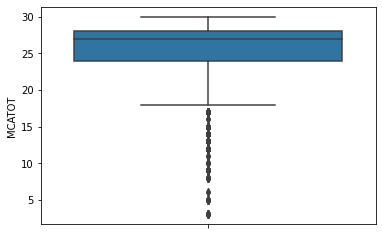

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y = pd_df['MCATOT'])

<AxesSubplot:>

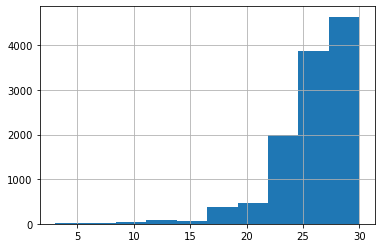

In [50]:
pd_df['MCATOT'].hist()

In [51]:
pd_df['MCATOT'].describe()

count    11598.000000
mean        25.960338
std          3.601037
min          3.000000
25%         24.000000
50%         27.000000
75%         28.000000
max         30.000000
Name: MCATOT, dtype: float64

In [52]:
pd_df['updrs1'].isnull().sum()

1586

<AxesSubplot:>

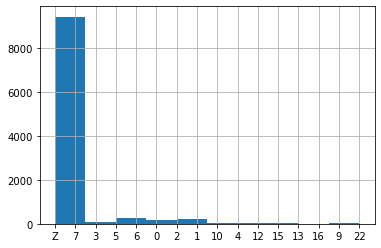

In [53]:
pd_df['updrs1'].hist()

In [54]:
pd_df['moca_ageassess'].isnull().sum()

156

In [55]:
print(pd_df['moca_ageassess'].dtype)

float64


In [56]:
age_range = pd_df['moca_ageassess'].max() - pd_df['moca_ageassess'].min()

max_age = pd_df['moca_ageassess'].max()

min_age = pd_df['moca_ageassess'].min()

print(f"Min Age : {min_age}")

print(f"Max Age : {max_age}")

print(f"Age range: {age_range}")

Min Age : 18.0
Max Age : 90.0
Age range: 72.0


In [57]:
pd_df['demopd_ageassess'].isnull().sum()

2243

In [58]:
print(pd_df['demopd_ageassess'].dtype)

float64


In [59]:
age_range = pd_df['demopd_ageassess'].max() - pd_df['demopd_ageassess'].min()

max_age = pd_df['demopd_ageassess'].max()

min_age = pd_df['demopd_ageassess'].min()

print(f"Min Age : {min_age}")

print(f"Max Age : {max_age}")

print(f"Age range: {age_range}")

Min Age : 20.0
Max Age : 90.0
Age range: 70.0


In [60]:
age_mean = pd_df['demopd_ageassess'].mean()
age_std = pd_df['demopd_ageassess'].std()


# Print the calculated statistics
print(f"Mean age: {age_mean:.2f}")
print(f"Standard deviation of age: {age_std:.2f}")


Mean age: 59.35
Standard deviation of age: 13.74


In [61]:
pd_df['demopd_ageassess'].describe()

count    9618.000000
mean       59.352152
std        13.740439
min        20.000000
25%        50.000000
50%        61.000000
75%        69.000000
max        90.000000
Name: demopd_ageassess, dtype: float64

<AxesSubplot:ylabel='demopd_ageassess'>

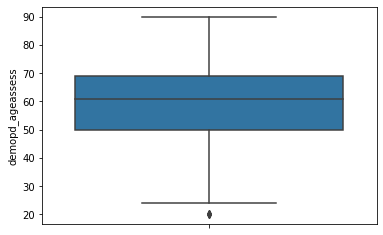

In [62]:
sns.boxplot(y = pd_df['demopd_ageassess'])

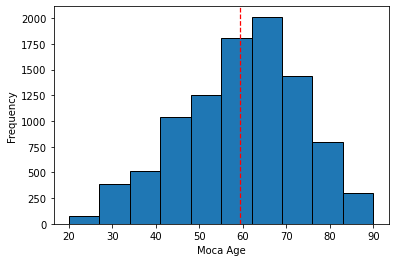

In [63]:

plt.hist(pd_df['demopd_ageassess'], edgecolor='black')


mean = np.mean(pd_df['demopd_ageassess'])


plt.axvline(mean, color='red', linestyle='dashed', linewidth=1.25)


plt.xlabel('Moca Age')
plt.ylabel('Frequency')


plt.show()

<AxesSubplot:>

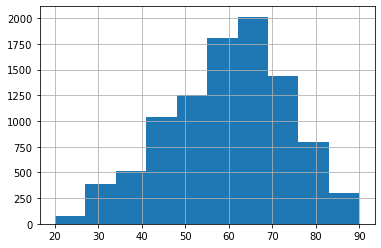

In [64]:
pd_df['demopd_ageassess'].hist()

In [65]:
pd_df['moca_ageassess'].describe()

count    11705.000000
mean        59.706279
std         13.188730
min         18.000000
25%         51.000000
50%         61.000000
75%         69.000000
max         90.000000
Name: moca_ageassess, dtype: float64

<AxesSubplot:ylabel='moca_ageassess'>

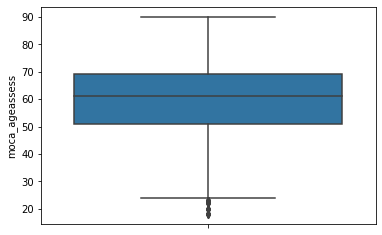

In [66]:
sns.boxplot(y = pd_df['moca_ageassess'])

<AxesSubplot:>

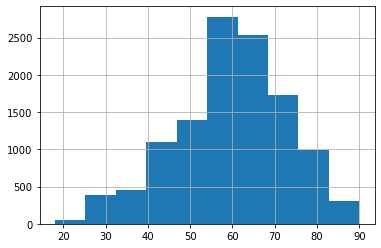

In [67]:
pd_df['moca_ageassess'].hist()

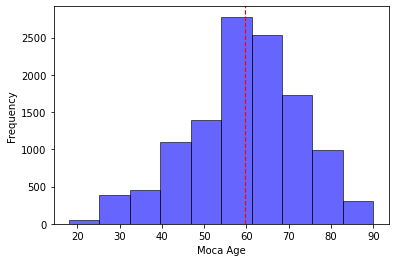

In [68]:

plt.hist(pd_df['moca_ageassess'],alpha=.6, color='blue', edgecolor='black')

mean = np.mean(pd_df['moca_ageassess'])

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1.2)


plt.xlabel('Moca Age')
plt.ylabel('Frequency')

plt.show()

In [69]:
columns_to_check = ['PR_DATE','RUNDATE','STROKE','HETRA','PARKISM','RLS','NARCLPSY','DEPRS','EPILEPSY','BRNINFM','CNSOTH','CNSOTHCM',
                    'SCAU26AT', 'SCAU26BT', 'SCAU26CT','SCAU26DT','LDOPRTYP','LDOPRSPC','DCLPDO5Y','GBA_var',
                    'GBA_status','LRRK2_var','LRRK2_status','APOE']

# Check for null values in the specified columns
null_check = pd_df[columns_to_check].isnull().sum()


print(null_check)

PR_DATE            0
RUNDATE            0
STROKE           258
HETRA            258
PARKISM         1759
RLS              286
NARCLPSY         258
DEPRS           1757
EPILEPSY        1757
BRNINFM          258
CNSOTH           372
CNSOTHCM        8938
SCAU26AT        8956
SCAU26BT        8862
SCAU26CT        8346
SCAU26DT        9149
LDOPRTYP        4060
LDOPRSPC        5800
DCLPDO5Y        8513
GBA_var         5322
GBA_status      5322
LRRK2_var       5322
LRRK2_status    5322
APOE            5322
dtype: int64


In [70]:
pd_df['LDOPRTYP'].value_counts()

1    2721
Z    2593
2    2317
4     126
3      44
Name: LDOPRTYP, dtype: int64

In [71]:
pd_df['LDOPRSPC'].value_counts()

5.0    2746
1.0    1880
6.0    1032
2.0     282
3.0     102
4.0      19
Name: LDOPRSPC, dtype: int64

In [72]:
pd_df['DCLPDO5Y'].value_counts()

0.0    2088
1.0     957
2.0     303
Name: DCLPDO5Y, dtype: int64

In [73]:
pd_df['PR_DATE'].value_counts()

09/04/2015    2830
12/07/2016    2375
05/08/2019    1440
05/19/2020     835
07/10/2017     632
08/29/2016     566
03/13/2018     364
01/26/2022     347
11/03/2020     342
04/08/2021     271
09/17/2018     227
03/01/2021     222
11/29/2021     220
03/20/2019     178
04/09/2021     165
11/19/2018     140
05/11/2022     128
06/11/2019     121
02/19/2019     118
10/21/2020     107
09/23/2019     106
09/26/2017      57
10/19/2018      36
06/28/2018      34
Name: PR_DATE, dtype: int64

In [74]:
pd_df['PR_DATE']= pd.to_datetime(pd_df['PR_DATE'])

# Find the date range
min_date = pd_df['PR_DATE'].min()
max_date = pd_df['PR_DATE'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)


Minimum date: 2015-09-04 00:00:00
Maximum date: 2022-05-11 00:00:00


In [75]:
pd_df['RUNDATE'].value_counts()

01/06/2020    835
05/01/2016    566
10/11/2014    400
10/17/2018    288
12/10/2018    274
             ... 
04/22/2015      1
04/21/2015      1
04/20/2015      1
04/19/2015      1
04/08/2015      1
Name: RUNDATE, Length: 250, dtype: int64

In [76]:
print(pd_df['RUNDATE'].dtype)

object


In [77]:
from datetime import datetime

def convert_to_desired_format(dt):
    try:
        parsed_dt = pd.to_datetime(dt)
        formatted_dt = parsed_dt.strftime('%Y-%m-%d %H:%M:%S')
        return formatted_dt
    except:
        return None  # Return None for invalid datetime values
    

    
pd_df['RUNDATE'] = pd_df['RUNDATE'].apply(convert_to_desired_format)

In [78]:
pd_df['RUNDATE'] = pd.to_datetime(pd_df['RUNDATE'])

# Find the date range
min_date = pd_df['RUNDATE'].min()
max_date = pd_df['RUNDATE'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2014-10-01 00:00:00
Maximum date: 2021-11-05 00:00:00


In [79]:
pd_df['RUNDATE'].value_counts()

2020-01-06    835
2016-05-01    566
2014-10-11    400
2018-10-17    288
2018-12-10    274
             ... 
2015-03-11      1
2015-03-04      1
2015-03-09      1
2015-03-07      1
2015-04-26      1
Name: RUNDATE, Length: 247, dtype: int64

In [80]:
columns_to_drop = ['Biomarker_project_type', 'PR_DATE','Biomarker_PI','Biomarker_institution','Biomarker_projectID',
                   'Biomarker_sampletype','TESTNAME','TESTVALUE','UNITS','RUNDATE','EVENT','LRRK2_MUTATION','datasrc',
                  'racetxt','ethnctxt','CNSOTHCM','CNSOTHCM_Z','GBA_var','GBA_status','LRRK2_var','LRRK2_status','APOE'] 

In [81]:
Final_df = pd_df.drop(columns=columns_to_drop)

In [82]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11861 entries, 0 to 11860
Columns: 4379 entries, lrrkid to CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed
dtypes: float64(9), object(4343), uint8(27)
memory usage: 394.2+ MB


In [83]:
Final_df.head()

,lrrkid,gender,educcat_calc,pdenrl,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1420001,2.0,6.0,1.0,42,40,72.0,30.0,Z,25.0,...,0,0,0,0,0,0,0,0,0,0
1,1420001,2.0,6.0,1.0,42,40,72.0,30.0,Z,25.0,...,0,0,0,0,0,0,0,0,0,0
2,1420001,2.0,6.0,1.0,42,40,72.0,30.0,Z,25.0,...,0,0,0,0,0,0,0,0,0,0
3,1420001,2.0,6.0,1.0,42,40,72.0,30.0,Z,25.0,...,0,0,0,0,0,0,0,0,0,0
4,1420001,2.0,6.0,1.0,42,40,72.0,30.0,Z,25.0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
Final_df = Final_df.replace('Z', 0)

In [85]:
Final_df.head()

,lrrkid,gender,educcat_calc,pdenrl,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1420001,2.0,6.0,1.0,42,40,72.0,30.0,0.0,25.0,...,0,0,0,0,0,0,0,0,0,0
1,1420001,2.0,6.0,1.0,42,40,72.0,30.0,0.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,1420001,2.0,6.0,1.0,42,40,72.0,30.0,0.0,25.0,...,0,0,0,0,0,0,0,0,0,0
3,1420001,2.0,6.0,1.0,42,40,72.0,30.0,0.0,25.0,...,0,0,0,0,0,0,0,0,0,0
4,1420001,2.0,6.0,1.0,42,40,72.0,30.0,0.0,25.0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
Final_df.to_csv("Data/FPDDF.csv",index=False)

In [87]:
mean_value = Final_df['MCATOT'].mean()

rounded_mean = round(mean_value)

Final_df['MCATOT'].fillna(rounded_mean, inplace=True)

In [88]:
Final_df['MCATOT'].isnull().sum()

0

In [89]:
Final_df['MCATOT'].describe()

count    11861.000000
mean        25.961217
std          3.560891
min          3.000000
25%         24.000000
50%         27.000000
75%         28.000000
max         30.000000
Name: MCATOT, dtype: float64

In [90]:
Final_df['SCAU26AT'].value_counts()

0                                  2593
Movicol                              91
Domperidone                          40
miralax                              20
metamucil                            17
SMOOTH MOVE TEA                      11
0                                    11
NONE                                 10
suppository                           9
supps                                 9
fiber supplement tablet               8
ESTROGEN ACNE MED                     7
DOMPERIDONE                           7
ducolax, senecot                      6
Duspatal                              6
STOOL SOFTENER                        6
colace, miralax                       6
phyllips tablets                      5
lactulose                             5
linum seeds                           5
COLACE                                5
Movicol, if necessary                 5
laxative daily                        3
DUCALAX                               3
laxaday                               3


In [91]:
Final_df['SCAU26BT'].value_counts()

0                                                      2593
duodart (5-alphareductase inhibitor & alpha inhib.)      45
fesoterodine                                             41
antibiotics: urinary tract infection                     38
furosemide                                               32
FINASTERIDE                                              31
flomax                                                   28
Tamsulosin                                               20
tamsulosine                                              17
0                                                        14
flomax, avadart                                          11
TOVIAZ                                                   10
SOLIFENACINE, SERENOA                                    10
detrol                                                    9
stress incon                                              9
tolterodine tartrate                                      9
amoxicillin noroxin                     

In [92]:
Final_df['SCAU26CT'].value_counts()

0                    2593
Selo-Zok               66
enalapril              50
atenolol               50
Hydrochlorthiazid      48
                     ... 
amloipine               2
atcaolol                2
Hidrosauretil           2
Captocomp               2
ramipril                2
Name: SCAU26CT, Length: 74, dtype: int64

In [93]:
Final_df['SCAU26DT'].value_counts()

PD                                        55
omeprazol                                 51
lorazepam                                 51
alprazolam, paroxetine                    41
Tamsulosine, metformine                   41
                                          ..
fluoxetine during ovulation/pre-menst.     1
PD  & Thyroid                              1
statin (lipitor)                           1
Parkinson"s symptoms                       1
hypothyroid                                1
Name: SCAU26DT, Length: 352, dtype: int64

In [94]:
Final_df['LDOPRTYP'].value_counts()

1    2721
0    2593
2    2317
4     126
3      44
Name: LDOPRTYP, dtype: int64

In [95]:
Final_df['LDOPRSPC'].value_counts()

5.0    2746
1.0    1880
6.0    1032
2.0     282
3.0     102
4.0      19
Name: LDOPRSPC, dtype: int64

In [96]:
Final_df['DCLPDO5Y'].value_counts()

0.0    2088
1.0     957
2.0     303
Name: DCLPDO5Y, dtype: int64

In [97]:
categorical_columns = ['SCAU26AT', 'SCAU26BT', 'SCAU26CT','SCAU26DT']

# Replace categorical values with 1, excluding 0 and null
for col in categorical_columns:
    Final_df[col] = Final_df[col].apply(lambda x: 1 if x not in [0, np.nan] else x)

In [99]:
Final_df = Final_df.fillna(0)

In [100]:
Final_df.head()

,lrrkid,gender,educcat_calc,pdenrl,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1420001,2.0,6.0,1.0,42,40,72.0,30.0,0.0,25.0,...,0,0,0,0,0,0,0,0,0,0
1,1420001,2.0,6.0,1.0,42,40,72.0,30.0,0.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,1420001,2.0,6.0,1.0,42,40,72.0,30.0,0.0,25.0,...,0,0,0,0,0,0,0,0,0,0
3,1420001,2.0,6.0,1.0,42,40,72.0,30.0,0.0,25.0,...,0,0,0,0,0,0,0,0,0,0
4,1420001,2.0,6.0,1.0,42,40,72.0,30.0,0.0,25.0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
len(Final_df)

11861

In [102]:
def replace_non_numeric_with_zero(value):
    try:
        numeric_value = float(value)
        return numeric_value
    except (ValueError, TypeError):
        return 0

# Apply the function to the entire DataFrame
Final_df = Final_df.applymap(replace_non_numeric_with_zero)

In [103]:
Final_df = Final_df.astype(float)

In [104]:
Final_df.head()

,lrrkid,gender,educcat_calc,pdenrl,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
Final_df.to_csv("Data/F_PDDF.csv",index=False)

In [105]:
# Unique patients id

patient_id = Final_df["lrrkid"].unique()

#randomly shuffle patient. 

np.random.shuffle(patient_id)

patient_id[:5]

array([ 850006.,  520005., 9530001., 1810001.,  670001.])

In [106]:
total_data = Final_df["lrrkid"].isin(patient_id[:round(0.7 * len(patient_id))])

train_data = Final_df.loc[total_data, :]
test_data = Final_df.loc[~total_data, :]

In [107]:
train_data['lrrkid'].isin(test_data['lrrkid']).value_counts()

False    8342
Name: lrrkid, dtype: int64

In [108]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3519 entries, 8 to 11848
Columns: 4379 entries, lrrkid to CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed
dtypes: float64(4379)
memory usage: 117.6 MB


In [109]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8342 entries, 0 to 11860
Columns: 4379 entries, lrrkid to CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed
dtypes: float64(4379)
memory usage: 278.8 MB


In [110]:
train_data.head(15)

,lrrkid,gender,educcat_calc,pdenrl,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,660003.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,660003.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
test_data['lrrkid'].nunique()

289

In [112]:
train_data['lrrkid'].nunique()

675

In [113]:
train_data["pdenrl"].value_counts()

1.0    4294
0.0    4048
Name: pdenrl, dtype: int64

In [114]:
test_data["pdenrl"].value_counts()

0.0    1921
1.0    1598
Name: pdenrl, dtype: int64

In [115]:
train_data.to_csv("Data/pd_trainData.csv",index=False)

In [116]:
test_data.to_csv("Data/pd_testData.csv",index=False)